In [1091]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn .metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib as jl
import warnings
warnings.filterwarnings("ignore")

In [1092]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [1093]:
df.shape

(891, 12)

In [1094]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1095]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1096]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1097]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1098]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1099]:
df.duplicated().sum()

np.int64(0)

### Data Cleaning

In [1100]:
df.drop(columns="PassengerId", inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1101]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [1102]:
df["Age"].fillna(np.round((df["Age"].mean()),2), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Cabin"] = df["Cabin"].str[0]
df["Cabin"].fillna("U", inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [1103]:
df.duplicated().sum()

np.int64(0)

### Feature engineering

In [1104]:
df["Title"] = df["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()
df.drop(columns="Name", inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,U,S,Mr


In [1105]:
df["TicketType"] = df["Ticket"].apply(lambda x: x[0] if x[0].isalpha() else "U")
df.drop(columns="Ticket", inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,TicketType
0,0,3,male,22.0,1,0,7.2500,U,S,Mr,A
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs,P
2,1,3,female,26.0,0,0,7.9250,U,S,Miss,S
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs,U
4,0,3,male,35.0,0,0,8.0500,U,S,Mr,U


### Visual Representation

In [1106]:
df["Title"] = df["Title"].replace(
    ["Mlle", "Ms", "Mme"], "Miss"
)
df["Title"] = df["Title"].replace(
    ["Lady", "the Countess", "Don", "Sir", "Jonkheer", "Col", "Major", "Dr", "Rev", "Capt"], "Rare"
)

In [1107]:
numerical_columns = ["Age", "SibSp", "Parch", "Fare", "Pclass"]
categorical_columns = ["Survived", "Sex", "Cabin", "Embarked", "Title", "TicketType"]

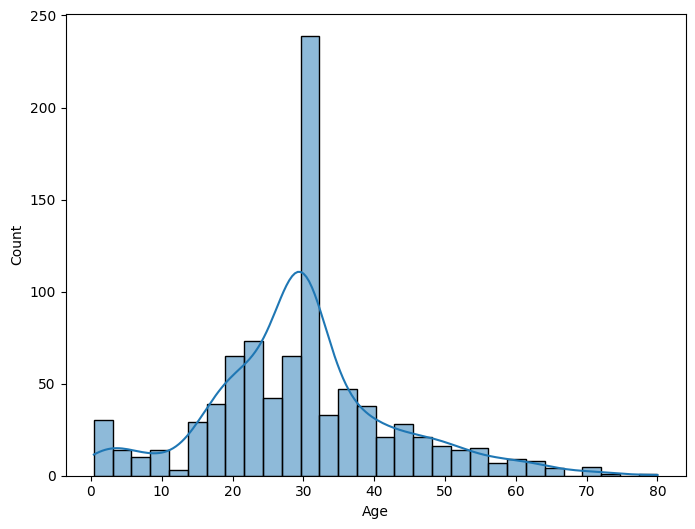

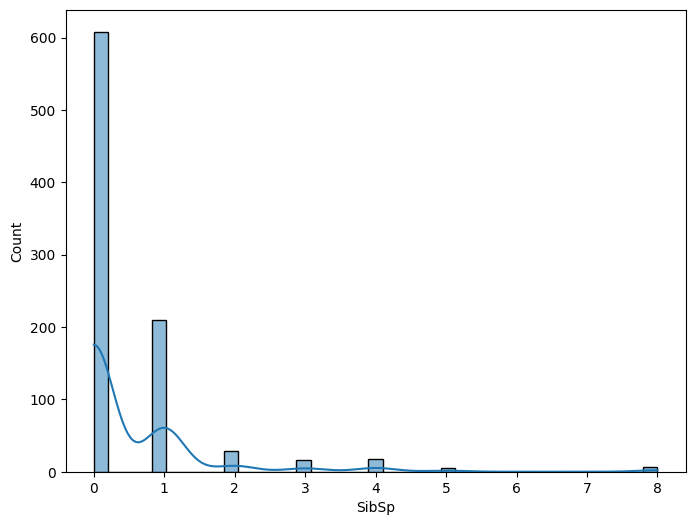

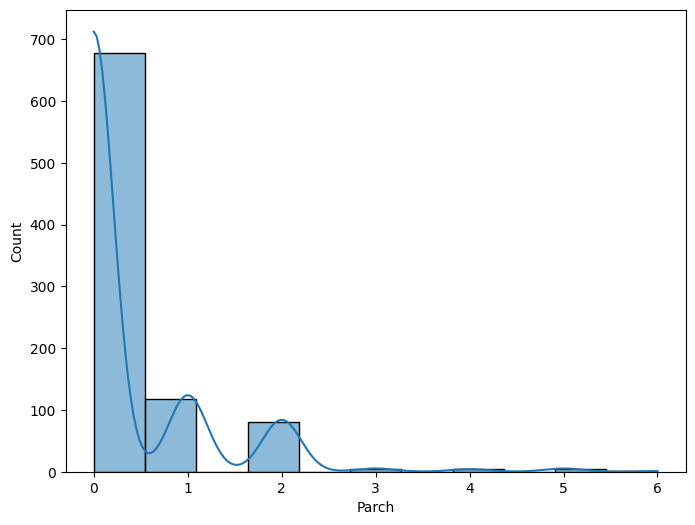

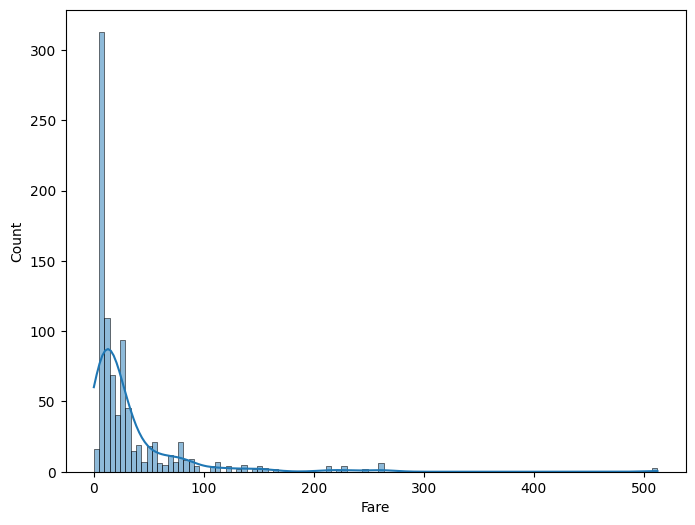

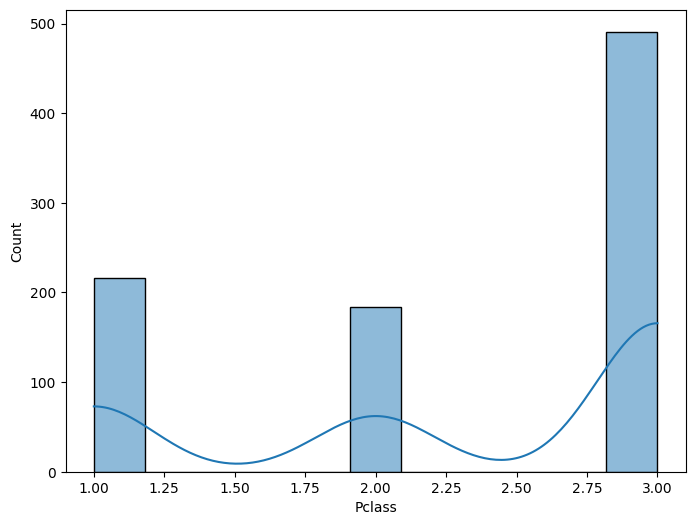

In [1108]:
for column in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=column, kde=True)

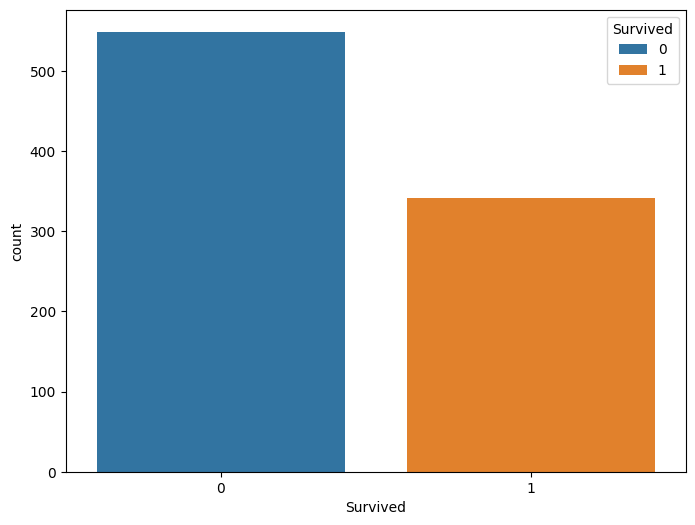

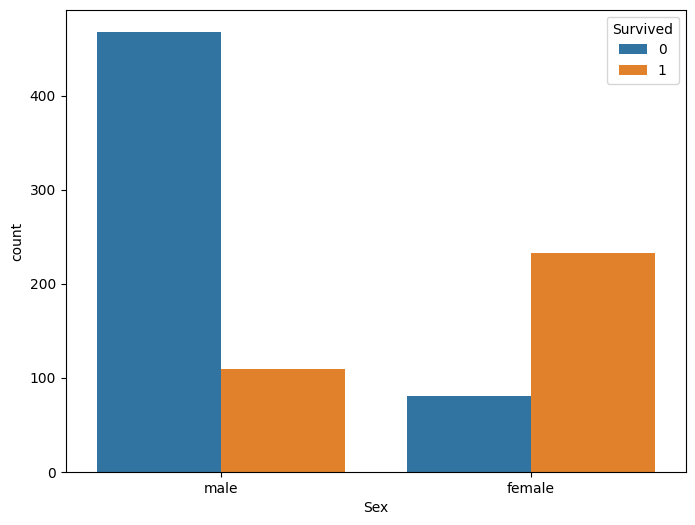

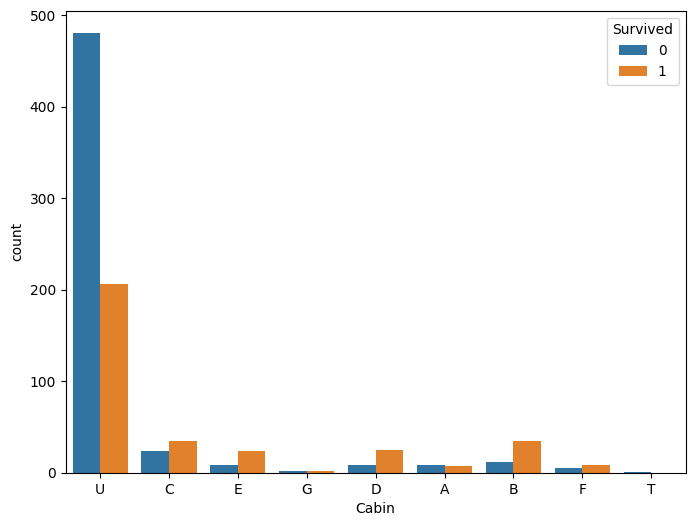

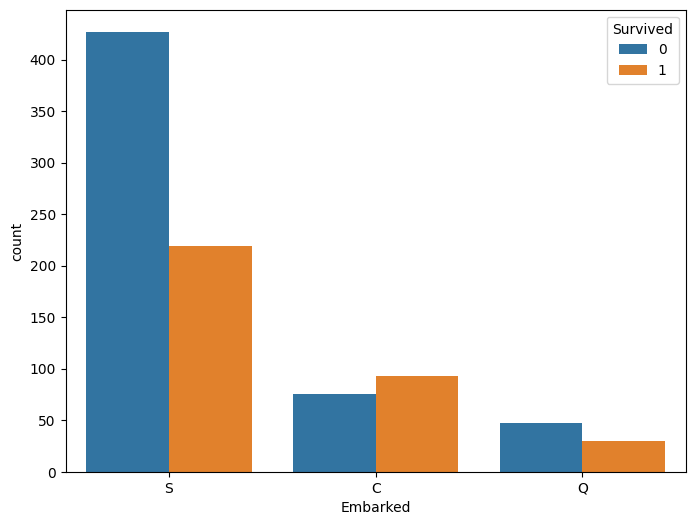

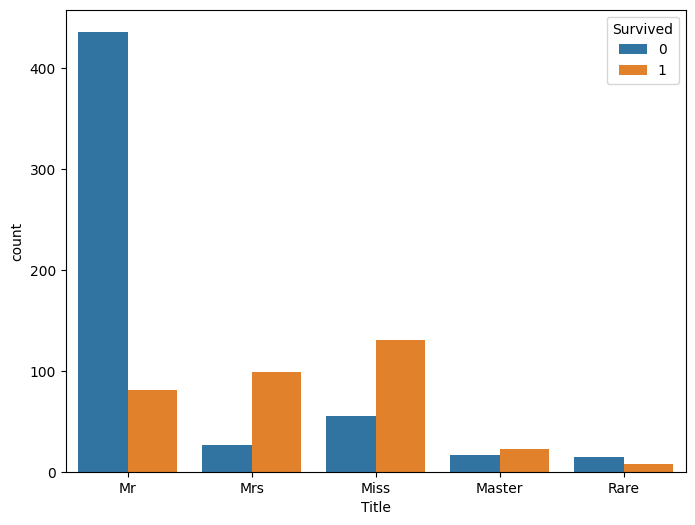

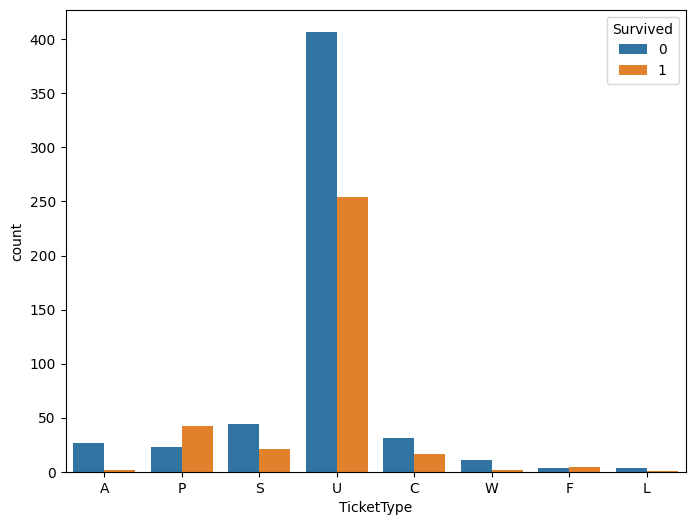

In [1109]:
for column in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=column, hue="Survived")

<Axes: >

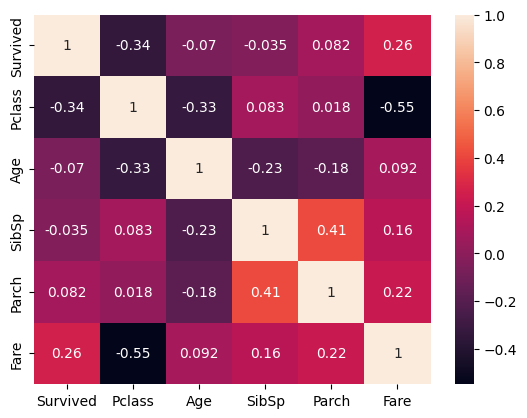

In [1110]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Feature Extraction

- for categorical columns

In [1111]:
from scipy.stats import chi2_contingency
alpha = 0.05
chi2_results = {}
for column in categorical_columns:
    contingency = pd.crosstab(df[column], df["Survived"])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[column] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }
chi2_df = pd.DataFrame(chi2_results).T
chi2_df

,chi2_statistic,p_value,Decision
Survived,886.776802,0.0,Reject Null (Keep Feature)
Sex,260.71702,0.0,Reject Null (Keep Feature)
Cabin,99.164161,0.0,Reject Null (Keep Feature)
Embarked,25.964453,0.000002,Reject Null (Keep Feature)
Title,287.92803,0.0,Reject Null (Keep Feature)
TicketType,36.709889,0.000005,Reject Null (Keep Feature)


### Label Encoding

In [1112]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,TicketType
0,0,3,male,22.0,1,0,7.2500,U,S,Mr,A
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs,P
2,1,3,female,26.0,0,0,7.9250,U,S,Miss,S
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs,U
4,0,3,male,35.0,0,0,8.0500,U,S,Mr,U


In [1113]:
df["TicketType"].value_counts()

TicketType
U    661
P     65
S     65
C     47
A     29
W     13
F      7
L      4
Name: count, dtype: int64

In [1114]:
df["Sex"] = df["Sex"].map({
    "male": 1,
    "female": 0
})

In [1115]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,TicketType
0,0,3,1,22.0,1,0,7.2500,U,S,Mr,A
1,1,1,0,38.0,1,0,71.2833,C,C,Mrs,P
2,1,3,0,26.0,0,0,7.9250,U,S,Miss,S
3,1,1,0,35.0,1,0,53.1000,C,S,Mrs,U
4,0,3,1,35.0,0,0,8.0500,U,S,Mr,U


In [1116]:
df = pd.get_dummies(df, drop_first=True)
df = df.astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,TicketType_C,TicketType_F,TicketType_L,TicketType_P,TicketType_S,TicketType_U,TicketType_W
0,0,3,1,22,1,0,7,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,38,1,0,71,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,3,0,26,0,0,7,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0
3,1,1,0,35,1,0,53,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,3,1,35,0,0,8,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0


### Feature Scaling

In [1117]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,TicketType_C,TicketType_F,TicketType_L,TicketType_P,TicketType_S,TicketType_U,TicketType_W
0,0,0.827377,1,-0.580044,0.432793,-0.473674,-0.498948,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1,1,-1.566107,0,0.650112,0.432793,-0.473674,0.789405,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,0.827377,0,-0.272505,-0.474545,-0.473674,-0.498948,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0
3,1,-1.566107,0,0.419458,0.432793,-0.473674,0.427056,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,0.827377,1,0.419458,-0.474545,-0.473674,-0.478817,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0


### Feature Extraction

- for numerical columns

In [1118]:
result = {}
for column in numerical_columns:
    result[column] = df[column].corr(df["Survived"])
corr = pd.DataFrame([result])
corr

,Age,SibSp,Parch,Fare,Pclass
0,-0.067809,-0.035322,0.081629,0.257482,-0.338481


### Final df

In [1119]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,TicketType_C,TicketType_F,TicketType_L,TicketType_P,TicketType_S,TicketType_U,TicketType_W
0,0,0.827377,1,-0.580044,0.432793,-0.473674,-0.498948,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1,1,-1.566107,0,0.650112,0.432793,-0.473674,0.789405,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,0.827377,0,-0.272505,-0.474545,-0.473674,-0.498948,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0
3,1,-1.566107,0,0.419458,0.432793,-0.473674,0.427056,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,0.827377,1,0.419458,-0.474545,-0.473674,-0.478817,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0


In [1120]:
X = df.drop(columns="Survived")
y = df["Survived"]
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced')
}
results = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    results.append({
        "model": name,
        "accuracy_score": acc,
        "f1_score": f1
    })
df_results = pd.DataFrame(results)
df_results

,model,accuracy_score,f1_score
0,Logistic Regression,0.815642,0.792453
1,KNN,0.815642,0.769231
2,Naive Bayes,0.782123,0.771930
3,Decision Tree,0.810056,0.776316
4,SVM,0.832402,0.791667


In [1121]:
jl.dump(models["SVM"],"model.pkl")
jl.dump(scaler,"scaler.pkl")
jl.dump(X.columns.to_list(),"columns.pkl")

['columns.pkl']